# 機械学習　第８章　実習問題（回帰）

## 問題文に従って各問題ごとにセルを複数追加してプログラムを実装してください。

## ※ 準備作業
### ▶ 以下を実施してください。

In [ ]:
# ドライブのマウント
# ディレクトリの作成
# ディレクトリへの移動
# house_rent.csv のアップロード

## ※ matplotlib日本語化のためのライブラリのインストール
### ▶ 以下を実行してください。

In [143]:
!pip install japanize-matplotlib

## データ分析対象データ

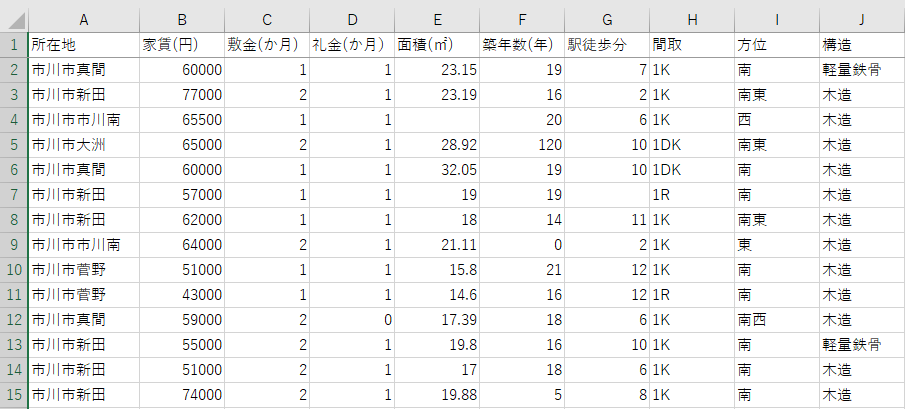

### ■ 正解データ　：　家賃（円）
### ■ 特徴量候補　：　所在地、敷金（か月）、礼金（か月）、面積（㎡）、築年数（年）、駅徒歩、間取、方位、構造

## 問題１　本データのデータ分析において使用する各種ライブラリをインポートしてください。
## また、グラフ表示が同一タブ上に表示されるようにしてください。

In [144]:
# 問1 ライブラリのインポート
import pandas  as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


## 問題２　CSVファイル house_rent.csv を読み込んでください。ただし、エンコーディングは cp932 を使用してください。

In [145]:
# 問2 csvファイルの読み込み
df = pd.read_csv('house_rent.csv',encoding='cp932')

## 問題３　読み込んだCSVファイルの先頭５行と末尾５行を表示してください。

In [146]:
# 問3
df.head()

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
0,市川市真間,60000,1,1.0,23.15,19.0,7.0,1K,南,軽量鉄骨
1,市川市新田,77000,2,1.0,23.19,16.0,2.0,1K,南東,木造
2,市川市市川南,65500,1,1.0,NaN,20.0,6.0,1K,西,木造
3,市川市大洲,65000,2,1.0,28.92,120.0,10.0,1DK,南東,木造
4,市川市真間,60000,1,1.0,32.05,19.0,10.0,1DK,南,木造


In [147]:
df.tail()

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
299,市川市新田,64000,2,1.0,22.01,NaN,5.0,1R,南,木造
300,市川市新田,52000,1,0.0,18.02,25.0,13.0,1K,南東,軽量鉄骨
301,市川市新田,57000,1,1.0,21.70,20.0,10.0,1K,南,木造
302,市川市真間,60000,1,1.0,20.37,13.0,14.0,1K,西,鉄骨造
303,市川市新田,72000,2,1.0,20.70,0.0,2.0,1K,東,鉄骨造


## 問題４　質的データの列をすべて挙げてください。つぎに、それらの列にデータが何種類あるかを調べて表示してください。

In [148]:
# 問4 質的データの表示
columns =['所在地','敷金(か月)','礼金(か月）','間取','方位','構造']
# 質的データ列の先頭5行を表示
df2 = df[columns]
df2.head()

,所在地,敷金(か月),礼金(か月）,間取,方位,構造
0,市川市真間,1,1.0,1K,南,軽量鉄骨
1,市川市新田,2,1.0,1K,南東,木造
2,市川市市川南,1,1.0,1K,西,木造
3,市川市大洲,2,1.0,1DK,南東,木造
4,市川市真間,1,1.0,1DK,南,木造


In [149]:
# 問4 質的データの種類(内容？数？わからないので両方出す)
for i in range(len(columns)):
    print(df2.columns[i],'の値は',df2.iloc[:,i].unique(),'、があり、',len(df2.iloc[:,i].unique()),'種類')

所在地 の値は ['市川市真間' '市川市新田' '市川市市川南' '市川市大洲' '市川市菅野' '市川市須和田' '市川市市川' '市川市大町' '市川市平田'
 '市川市大和田'] 、があり、 10 種類
敷金(か月) の値は [1 2 0] 、があり、 3 種類
礼金(か月） の値は [1.  0.  0.5 2. ] 、があり、 4 種類
間取 の値は ['1K' '1DK' '1R'] 、があり、 3 種類
方位 の値は ['南' '南東' '西' '東' '南西' '北東' '北'] 、があり、 7 種類
構造 の値は ['軽量鉄骨' '木造' '鉄骨造' nan] 、があり、 4 種類


## 問題５　質的データをすべてダミー化してデータ分析させるデータフレームを作成して下さい。次に、作成したデータフレームの先頭５行を表示してください。

In [151]:
# 問5
dummydf = pd.get_dummies(df2)
dummydf.head()

,敷金(か月),礼金(か月）,所在地_市川市大和田,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1DK,間取_1K,間取_1R,方位_北,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_木造,構造_軽量鉄骨,構造_鉄骨造
0,1,1.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,2,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,1,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
3,2,1.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,1,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


## 問題６　問題５で作成したデータフレームにおいて、訓練データ、検証データ、テストデータに分割してください。
### ただし、訓練データとテストデータの比率は８：２、乱数シードは０とします。

In [152]:
# 問6 訓練データ、テストデータの分割

# 目的変数をyに代入
y = df['家賃(円)']
# 説明変数をXに代入 dummydf と、面積(㎡)列をconcat して説明変数に代入
X = pd.concat([dummydf,df.loc[:,'面積(㎡)':'築年数(年)']],axis=1)

# Xの内容を確認(説明変数が全部入っているか？？)
X.head()

,敷金(か月),礼金(か月）,所在地_市川市大和田,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1DK,間取_1K,間取_1R,方位_北,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_木造,構造_軽量鉄骨,構造_鉄骨造,面積(㎡),築年数(年)
0,1,1.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,23.15,19.0
1,2,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,23.19,16.0
2,1,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,NaN,20.0
3,2,1.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,28.92,120.0
4,1,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,32.05,19.0


In [154]:
# 問6 訓練データ、テストデータの分割
# テストサイズ0.2, シード=0とのこと
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [155]:
X_train.head()

,敷金(か月),礼金(か月）,所在地_市川市大和田,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1DK,間取_1K,間取_1R,方位_北,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_木造,構造_軽量鉄骨,構造_鉄骨造,面積(㎡),築年数(年)
176,2,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,19.87,1.0
26,2,2.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,31.53,28.0
74,2,1.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,28.92,12.0
101,1,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,20.50,20.0
154,2,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,20.70,0.0


## 問題７　訓練データにおいて、欠損値を確認して表示し、平均値で穴埋めしてください。欠損値処理した訓練データの先頭５行を表示してください。

In [156]:
# 問7 訓練データの欠損値を平均値で補完

# 列ごとの欠損値の有無
X_train.isnull().sum()

敷金(か月)        0
礼金(か月）        0
所在地_市川市大和田    0
所在地_市川市大洲     0
所在地_市川市大町     0
所在地_市川市市川     0
所在地_市川市市川南    0
所在地_市川市平田     0
所在地_市川市新田     0
所在地_市川市真間     0
所在地_市川市菅野     0
所在地_市川市須和田    0
間取_1DK        0
間取_1K         0
間取_1R         0
方位_北          0
方位_北東         0
方位_南          0
方位_南東         0
方位_南西         0
方位_東          0
方位_西          0
構造_木造         0
構造_軽量鉄骨       0
構造_鉄骨造        0
面積(㎡)         1
築年数(年)        1
dtype: int64

In [157]:
# 問7 続き

# X_trainの面積,築年数 列のみ欠損値の補完を行う(平均値)
X_train['面積(㎡)'] = X_train['面積(㎡)'].fillna(X_train['面積(㎡)'].mean())
X_train['築年数(年)'] = X_train['築年数(年)'].fillna(X_train['築年数(年)'].mean())

X_train.head()

,敷金(か月),礼金(か月）,所在地_市川市大和田,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1DK,間取_1K,間取_1R,方位_北,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_木造,構造_軽量鉄骨,構造_鉄骨造,面積(㎡),築年数(年)
176,2,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,19.87,1.0
26,2,2.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,31.53,28.0
74,2,1.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,28.92,12.0
101,1,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,20.50,20.0
154,2,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,20.70,0.0


In [158]:
# 問7 続き
# 欠損値の確認(全体であるか？)
X_train.isnull().sum().sum()

0

## 問題８　外れ値処理をしてください。
### ただし、処理過程を説明できるようにセルを構成してください。

In [159]:
# 問8　外れ値の有無を確認するために散布図を描く
# 目的変数との相関を見るためにy_trainとconcat
df3 = pd.concat([X_train,y_train],axis = 1)
df3


,敷金(か月),礼金(か月）,所在地_市川市大和田,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1DK,間取_1K,間取_1R,方位_北,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_木造,構造_軽量鉄骨,構造_鉄骨造,面積(㎡),築年数(年),家賃(円)
176,2,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,19.87,1.0,69000
26,2,2.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,31.53,28.0,70000
74,2,1.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,28.92,12.0,65000
101,1,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,20.50,20.0,51000
154,2,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,20.70,0.0,72000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,20.70,0.0,67000
192,2,2.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,13.36,8.0,50000
117,1,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,24.75,14.0,67000
47,2,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,19.80,17.0,65000


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


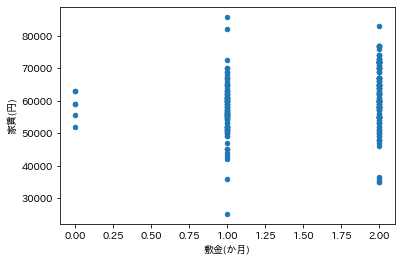

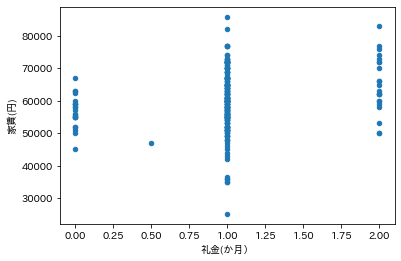

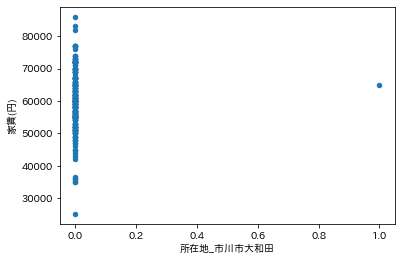

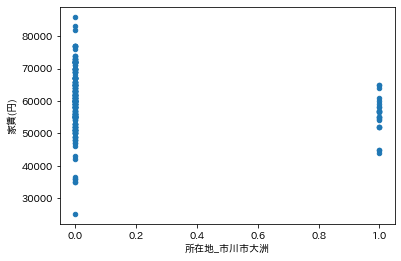

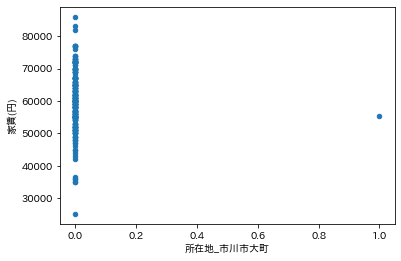

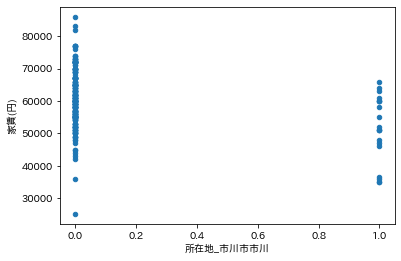

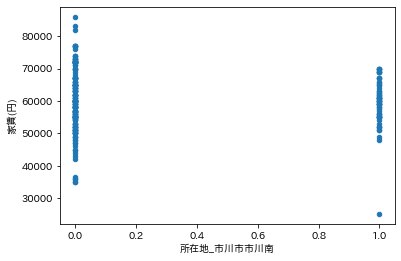

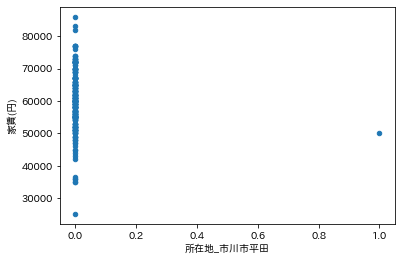

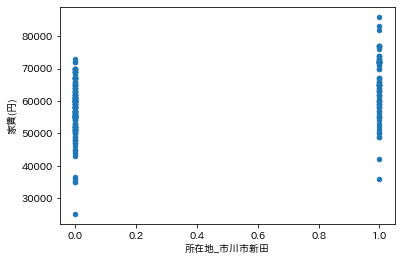

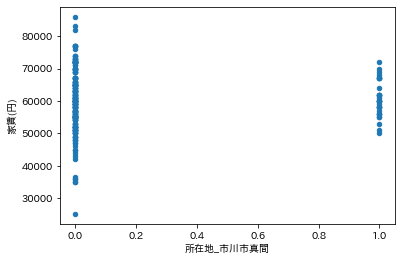

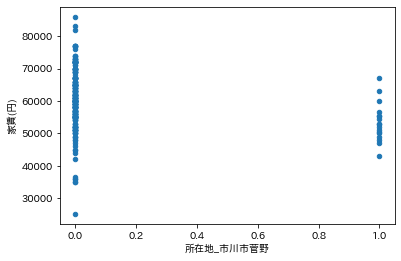

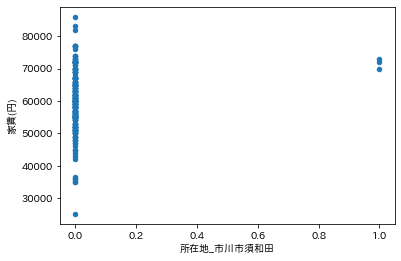

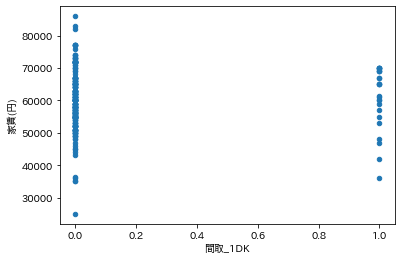

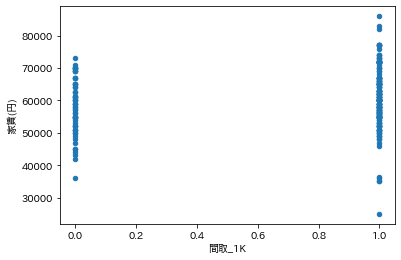

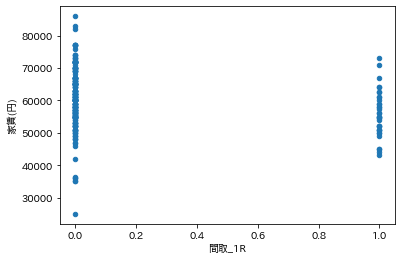

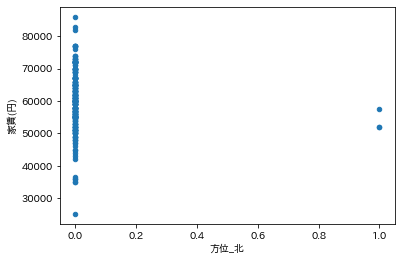

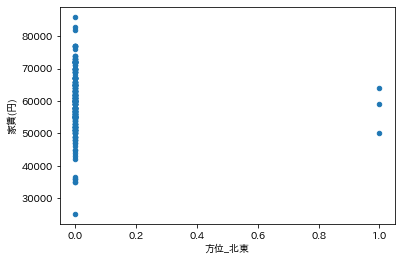

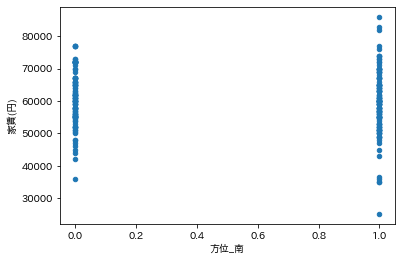

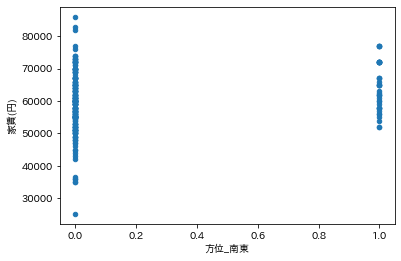

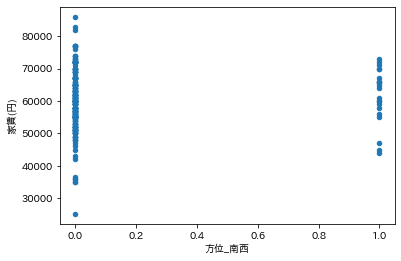

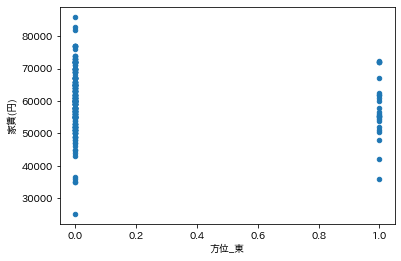

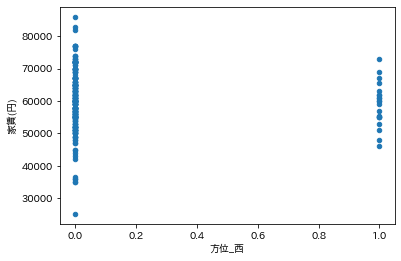

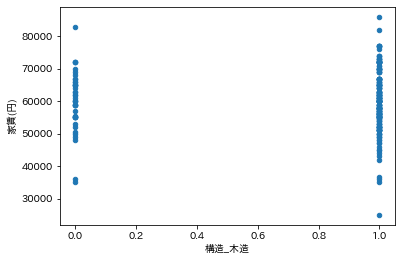

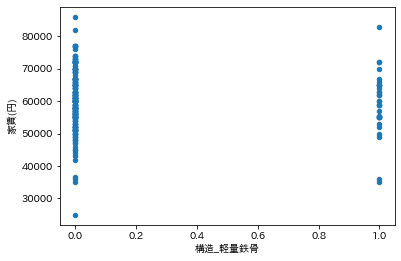

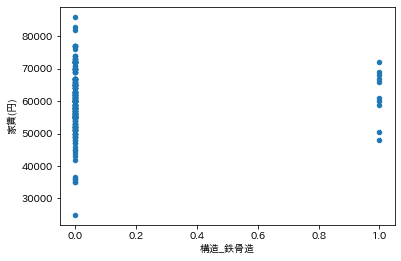

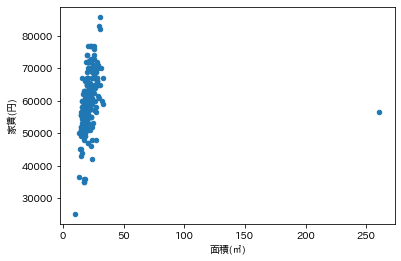

In [160]:
# 列ごとの散布図を描画し、外れ値を確認する
for i in range(len(X_train.columns)-1):
    df3.plot(kind='scatter',x=df3.columns[i],y=df3.columns[-1])


In [161]:
# 散布図から面積列に外れ値があるっぽいことがわかる。
# 面積：250以上でデータを取得し、確認する
idx = X_train[X_train['面積(㎡)']>250]
idx

,敷金(か月),礼金(か月）,所在地_市川市大和田,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1DK,間取_1K,間取_1R,方位_北,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_木造,構造_軽量鉄骨,構造_鉄骨造,面積(㎡),築年数(年)
95,1,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,260.94,23.0


In [162]:
# index=95を削除する
X_train.drop(idx.index,inplace=True)
y_train.drop(idx.index,inplace=True)

## 問題９　外れ値処理の結果を表示してください。

In [163]:
# 問9
# 再度同じことを繰り返して外れ値の確認を行う
df3 = pd.concat([X_train,y_train],axis = 1)
df3



,敷金(か月),礼金(か月）,所在地_市川市大和田,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1DK,間取_1K,間取_1R,方位_北,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_木造,構造_軽量鉄骨,構造_鉄骨造,面積(㎡),築年数(年),家賃(円)
176,2,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,19.87,1.0,69000
26,2,2.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,31.53,28.0,70000
74,2,1.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,28.92,12.0,65000
101,1,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,20.50,20.0,51000
154,2,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,20.70,0.0,72000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,20.70,0.0,67000
192,2,2.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,13.36,8.0,50000
117,1,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,24.75,14.0,67000
47,2,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,19.80,17.0,65000


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


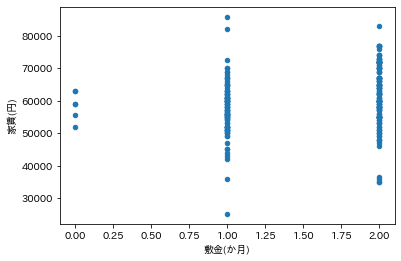

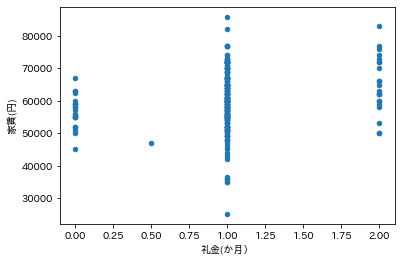

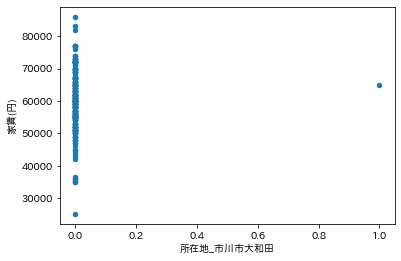

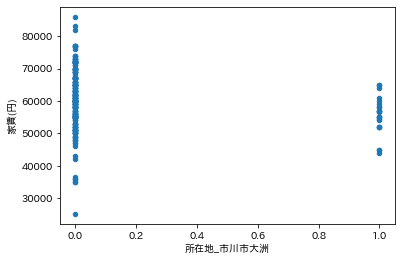

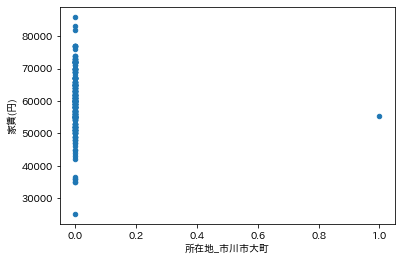

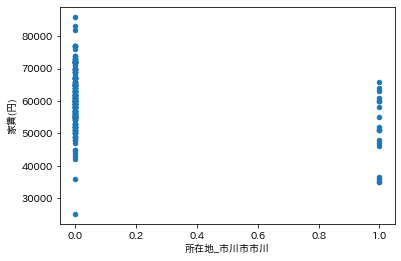

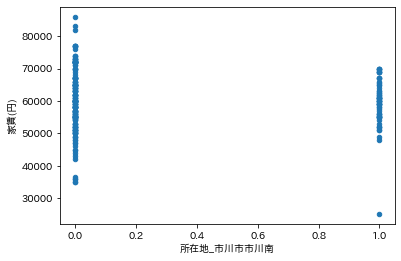

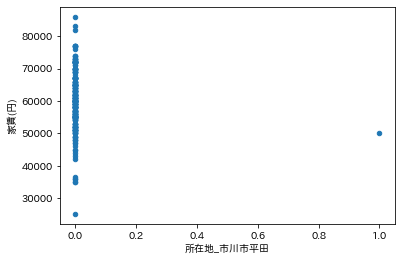

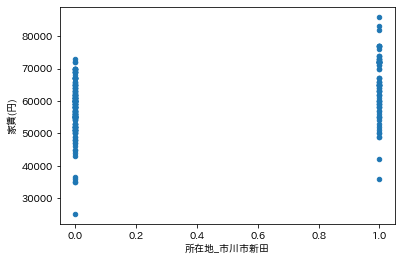

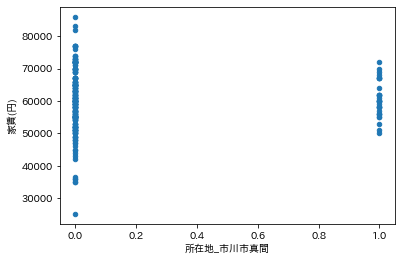

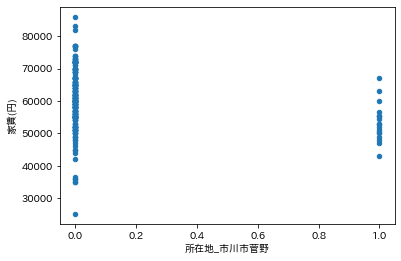

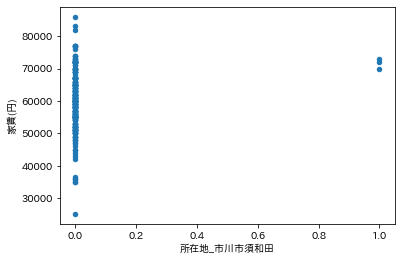

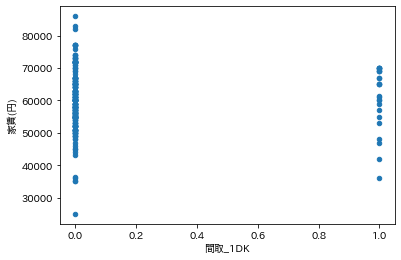

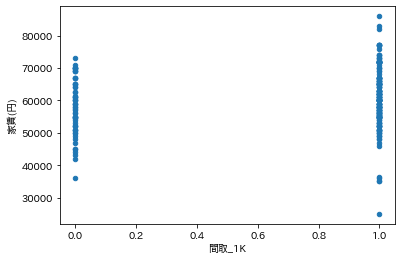

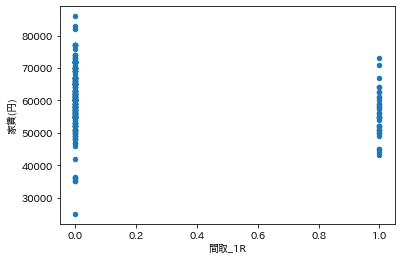

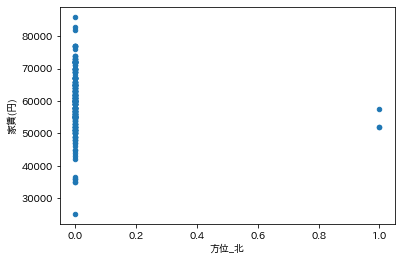

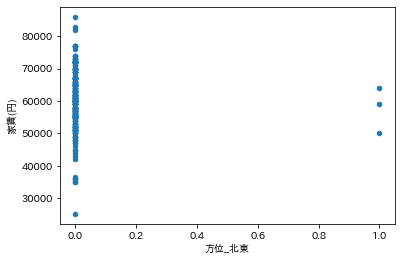

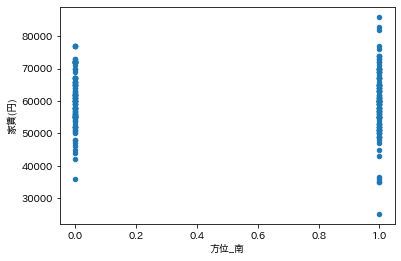

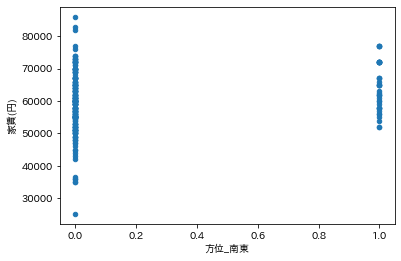

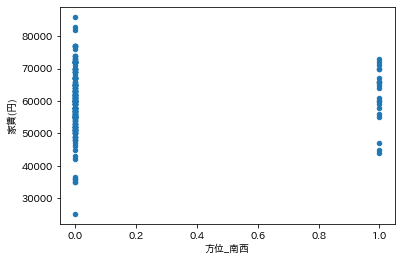

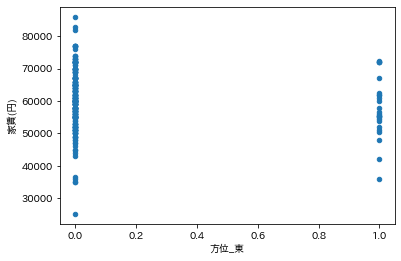

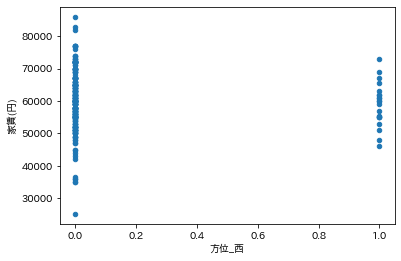

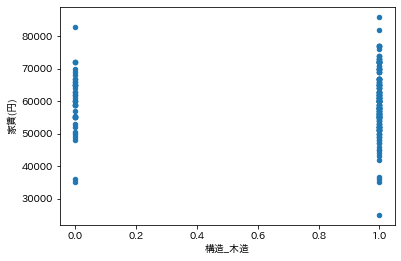

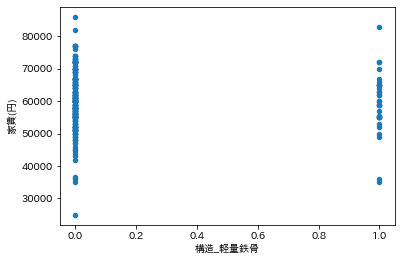

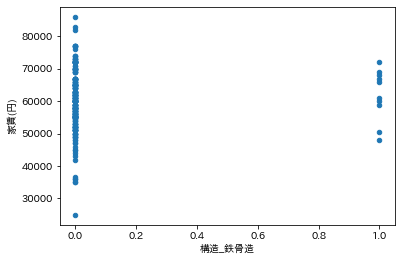

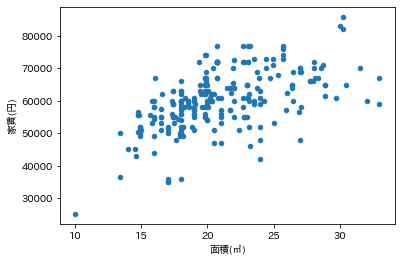

In [164]:
# 列ごとの散布図を描画し、外れ値を確認する
for i in range(len(X_train.columns)-1):
    df3.plot(kind='scatter',x=df3.columns[i],y=df3.columns[-1])

問：９→外れ値がなくなった！

## 問題１０　正解データと各特徴量の相関関係を説明できるように表示してください。

In [165]:
df3[['家賃(円)','敷金(か月)','礼金(か月）','面積(㎡)','築年数(年)']].corr()

,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年)
家賃(円),1.000000,0.220935,0.207480,0.554575,-0.419237
敷金(か月),0.220935,1.000000,0.315382,0.211107,-0.118295
礼金(か月）,0.207480,0.315382,1.000000,0.163244,-0.196158
面積(㎡),0.554575,0.211107,0.163244,1.000000,0.001107
築年数(年),-0.419237,-0.118295,-0.196158,0.001107,1.000000


## 問題１１　正解データと特徴量を抽出し、それぞれの先頭５行を表示してください。

In [166]:
X.head()

,敷金(か月),礼金(か月）,所在地_市川市大和田,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1DK,間取_1K,間取_1R,方位_北,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_木造,構造_軽量鉄骨,構造_鉄骨造,面積(㎡),築年数(年)
0,1,1.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,23.15,19.0
1,2,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,23.19,16.0
2,1,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,NaN,20.0
3,2,1.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,28.92,120.0
4,1,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,32.05,19.0


In [167]:
y.head()

0    60000
1    77000
2    65500
3    65000
4    60000
Name: 家賃(円), dtype: int64

## 問題１２　問題１１で抽出した正解データと特徴量を使用して、訓練データと検証データに分割してください。
### ただし、訓練データと検証データの比率は８：２、乱数シードは０とします。

In [ ]:
# すでに分割済み

## 問題１３　線形重回帰モデルを使用して学習さて、検証データで決定係数を求めて表示してください。

In [168]:
# インスタンス化
model = LinearRegression()
# 学習
model.fit(X_train,y_train) 
# スコア
print('決定係数（テストデータ）', model.score(X_test,y_test))

決定係数（テストデータ） 0.5175724747573367


## 問題１４　問題１３で学習したモデルを使用して以下のデータを使用して家賃がいくらになるか予測させてください。
### 予測させるデータは以下の通りです。
#### 敷金：１か月
#### 礼金；１か月
#### 面積：３０㎡
#### 築年数：３年
#### 駅徒歩分：１０分
#### 所在地：市川市新田
#### 間取：１DK
#### 方位：南向き
#### 構造：鉄骨造


In [169]:
# X_trainのカラム情報を取得
X_train.columns

Index(['敷金(か月)', '礼金(か月）', '所在地_市川市大和田', '所在地_市川市大洲', '所在地_市川市大町', '所在地_市川市市川',
       '所在地_市川市市川南', '所在地_市川市平田', '所在地_市川市新田', '所在地_市川市真間', '所在地_市川市菅野',
       '所在地_市川市須和田', '間取_1DK', '間取_1K', '間取_1R', '方位_北', '方位_北東', '方位_南',
       '方位_南東', '方位_南西', '方位_東', '方位_西', '構造_木造', '構造_軽量鉄骨', '構造_鉄骨造', '面積(㎡)',
       '築年数(年)'],
      dtype='object')

In [170]:
target = pd.DataFrame(
    data={
        '敷金(か月)': pd.Series([1]), 
        '礼金(か月）': pd.Series([1]), 
        '所在地_市川市大和田': pd.Series([0]), 
        '所在地_市川市大洲': pd.Series([0]), 
        '所在地_市川市大町': pd.Series([0]), 
        '所在地_市川市市川':pd.Series([0]), 
        '所在地_市川市市川南': pd.Series([0]), 
        '所在地_市川市平田': pd.Series([0]), 
        '所在地_市川市新田': pd.Series([1]), 
        '所在地_市川市真間': pd.Series([0]), 
        '所在地_市川市菅野':pd.Series([0]), 
        '所在地_市川市須和田': pd.Series([0]), 
        '間取_1DK': pd.Series([1]), 
        '間取_1K': pd.Series([0]), 
        '間取_1R': pd.Series([0]), 
        '方位_北': pd.Series([0]), 
        '方位_北東': pd.Series([0]), 
        '方位_南':pd.Series([1]), 
        '方位_南東': pd.Series([0]), 
        '方位_南西': pd.Series([0]), 
        '方位_東': pd.Series([0]), 
        '方位_西': pd.Series([0]), 
        '構造_木造': pd.Series([0]), 
        '構造_軽量鉄骨':pd.Series([0]), 
        '構造_鉄骨造': pd.Series([1]), 
        '面積(㎡)':pd.Series([30]), 
        '築年数(年)':pd.Series([3])
    }
)
# 作成した予測用のデータ
target


,敷金(か月),礼金(か月）,所在地_市川市大和田,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1DK,間取_1K,間取_1R,方位_北,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_木造,構造_軽量鉄骨,構造_鉄骨造,面積(㎡),築年数(年)
0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,30,3


In [173]:
# モデルで予測
model.predict(target)


array([71956.52745016])

## 問題１５　特徴量エンジニアリングで訓練データと検証データの決定係数が特徴量エンジニアリングを行う前より良くなるようにしてください。
### ただし、特徴量エンジニアリングの過程が理解できるようにセルを構成してください。

In [192]:
# 問題15　もう一度相関係数を確認
df[['家賃(円)','敷金(か月)','礼金(か月）','面積(㎡)','築年数(年)','駅徒歩分']].corr()

,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分
家賃(円),1.000000,0.287654,0.199732,0.130808,-0.485575,-0.361622
敷金(か月),0.287654,1.000000,0.303327,0.006157,-0.196635,-0.223300
礼金(か月）,0.199732,0.303327,1.000000,0.044123,-0.204792,-0.145595
面積(㎡),0.130808,0.006157,0.044123,1.000000,0.026049,0.022453
築年数(年),-0.485575,-0.196635,-0.204792,0.026049,1.000000,0.182421
駅徒歩分,-0.361622,-0.223300,-0.145595,0.022453,0.182421,1.000000


In [217]:
edf = df.copy()
# 面積、築年数、駅徒歩分の欠損値を補完
edf['面積(㎡)'] = edf['面積(㎡)'].fillna(edf['面積(㎡)'].mean())
edf['築年数(年)'] = edf['築年数(年)'].fillna(edf['築年数(年)'].mean())
edf['駅徒歩分'] = edf['駅徒歩分'].fillna(edf['駅徒歩分'].mean())

In [218]:
edf.isnull().sum()

所在地       0
家賃(円)     0
敷金(か月)    0
礼金(か月）    0
面積(㎡)     0
築年数(年)    0
駅徒歩分      0
間取        0
方位        0
構造        1
dtype: int64

In [219]:
edf.dropna(inplace=True)

In [220]:
edf.isnull().sum()

所在地       0
家賃(円)     0
敷金(か月)    0
礼金(か月）    0
面積(㎡)     0
築年数(年)    0
駅徒歩分      0
間取        0
方位        0
構造        0
dtype: int64

In [221]:
# 相関が高い築年数は4乗して新しい列にする
edf['築年en'] = edf['築年数(年)'] ** 4
edf.head()

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造,築年en
0,市川市真間,60000,1,1.0,23.150000,19.0,7.0,1K,南,軽量鉄骨,130321.0
1,市川市新田,77000,2,1.0,23.190000,16.0,2.0,1K,南東,木造,65536.0
2,市川市市川南,65500,1,1.0,21.658878,20.0,6.0,1K,西,木造,160000.0
3,市川市大洲,65000,2,1.0,28.920000,120.0,10.0,1DK,南東,木造,207360000.0
4,市川市真間,60000,1,1.0,32.050000,19.0,10.0,1DK,南,木造,130321.0


In [222]:
edf.drop('築年数(年)', axis=1)
edf.head()

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造,築年en
0,市川市真間,60000,1,1.0,23.150000,19.0,7.0,1K,南,軽量鉄骨,130321.0
1,市川市新田,77000,2,1.0,23.190000,16.0,2.0,1K,南東,木造,65536.0
2,市川市市川南,65500,1,1.0,21.658878,20.0,6.0,1K,西,木造,160000.0
3,市川市大洲,65000,2,1.0,28.920000,120.0,10.0,1DK,南東,木造,207360000.0
4,市川市真間,60000,1,1.0,32.050000,19.0,10.0,1DK,南,木造,130321.0


In [223]:
# 駅徒歩分,'敷金(か月)','礼金(か月）','面積(㎡)'は3乗する
edf['駅徒歩分en'] = edf['駅徒歩分'] ** 3
edf['敷金en'] = edf['敷金(か月)'] ** 3
edf['礼金en'] = edf['礼金(か月）'] ** 3
edf['面積en'] = edf['面積(㎡)'] ** 3
edf.head()

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造,築年en,駅徒歩分en,敷金en,礼金en,面積en
0,市川市真間,60000,1,1.0,23.150000,19.0,7.0,1K,南,軽量鉄骨,130321.0,343.0,1,1.0,12406.605875
1,市川市新田,77000,2,1.0,23.190000,16.0,2.0,1K,南東,木造,65536.0,8.0,8,1.0,12471.027759
2,市川市市川南,65500,1,1.0,21.658878,20.0,6.0,1K,西,木造,160000.0,216.0,1,1.0,10160.331042
3,市川市大洲,65000,2,1.0,28.920000,120.0,10.0,1DK,南東,木造,207360000.0,1000.0,8,1.0,24187.716288
4,市川市真間,60000,1,1.0,32.050000,19.0,10.0,1DK,南,木造,130321.0,1000.0,1,1.0,32921.840125


In [224]:
# ダミー変数化
edummy = pd.get_dummies(edf)
edummy.head()

,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,築年en,駅徒歩分en,敷金en,礼金en,面積en,所在地_市川市大和田,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1DK,間取_1K,間取_1R,方位_北,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_木造,構造_軽量鉄骨,構造_鉄骨造
0,60000,1,1.0,23.150000,19.0,7.0,130321.0,343.0,1,1.0,12406.605875,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,77000,2,1.0,23.190000,16.0,2.0,65536.0,8.0,8,1.0,12471.027759,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,65500,1,1.0,21.658878,20.0,6.0,160000.0,216.0,1,1.0,10160.331042,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
3,65000,2,1.0,28.920000,120.0,10.0,207360000.0,1000.0,8,1.0,24187.716288,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,60000,1,1.0,32.050000,19.0,10.0,130321.0,1000.0,1,1.0,32921.840125,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [225]:
X = edummy.drop('家賃(円)',axis=1)
X.head()

,敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,築年en,駅徒歩分en,敷金en,礼金en,面積en,所在地_市川市大和田,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1DK,間取_1K,間取_1R,方位_北,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_木造,構造_軽量鉄骨,構造_鉄骨造
0,1,1.0,23.150000,19.0,7.0,130321.0,343.0,1,1.0,12406.605875,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,2,1.0,23.190000,16.0,2.0,65536.0,8.0,8,1.0,12471.027759,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,1,1.0,21.658878,20.0,6.0,160000.0,216.0,1,1.0,10160.331042,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
3,2,1.0,28.920000,120.0,10.0,207360000.0,1000.0,8,1.0,24187.716288,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,1,1.0,32.050000,19.0,10.0,130321.0,1000.0,1,1.0,32921.840125,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [226]:
y = edummy['家賃(円)']
y.head()

0    60000
1    77000
2    65500
3    65000
4    60000
Name: 家賃(円), dtype: int64

## 問題１６　チューニング結果を受けて、データの標準化後再学習をしてください。

## 問題１７　テストデータを使用してモデルを評価してください。
## ただし、決定係数の値が 0.65 以上となるようにしてください。

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [228]:
# 多項式特徴量による決定係数を確認
# インスタンス化
model = LinearRegression()
# 学習
model.fit(X_train,y_train) 
# スコア
print('決定係数（テストデータ）', model.score(X_test,y_test))

決定係数（テストデータ） 0.6745102909379554


In [314]:
# # イマイチの決定係数だったので相互作用特徴量を追加


# # 初期状態のDataFrameからコピー
# edf = df.copy()

# # 外れ値の削除
# idx = edf[edf['面積(㎡)']>250]
# edf.drop(idx.index,inplace=True)

# # 面積、築年数、駅徒歩分の欠損値を補完
# edf['面積(㎡)'] = edf['面積(㎡)'].fillna(edf['面積(㎡)'].mean())
# edf['築年数(年)'] = edf['築年数(年)'].fillna(edf['築年数(年)'].mean())
# edf['駅徒歩分'] = edf['駅徒歩分'].fillna(edf['駅徒歩分'].mean())
# edf.dropna(inplace=True)
# edf.isnull().sum()


所在地       0
家賃(円)     0
敷金(か月)    0
礼金(か月）    0
面積(㎡)     0
築年数(年)    0
駅徒歩分      0
間取        0
方位        0
構造        0
dtype: int64

In [315]:
# # 相関が高い築年数は4乗して新しい列にする
# edf['築年en'] = edf['築年数(年)'] ** 4
# edf = edf.drop('築年数(年)',axis=1)
# edf.head()

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),駅徒歩分,間取,方位,構造,築年en
0,市川市真間,60000,1,1.0,23.150000,7.0,1K,南,軽量鉄骨,130321.0
1,市川市新田,77000,2,1.0,23.190000,2.0,1K,南東,木造,65536.0
2,市川市市川南,65500,1,1.0,20.866556,6.0,1K,西,木造,160000.0
3,市川市大洲,65000,2,1.0,28.920000,10.0,1DK,南東,木造,207360000.0
4,市川市真間,60000,1,1.0,32.050000,10.0,1DK,南,木造,130321.0


In [317]:
# # 相互作用特徴量化してみる
# edf['相互作用特徴量'] = edf['面積(㎡)'] * edf['駅徒歩分']
# # edf = edf.drop('敷金(か月)',axis=1)
# # edf = edf.drop('礼金(か月）',axis=1)
# edf.head()

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),駅徒歩分,間取,方位,構造,築年en,相互作用特徴量
0,市川市真間,60000,1,1.0,23.150000,7.0,1K,南,軽量鉄骨,130321.0,162.050000
1,市川市新田,77000,2,1.0,23.190000,2.0,1K,南東,木造,65536.0,46.380000
2,市川市市川南,65500,1,1.0,20.866556,6.0,1K,西,木造,160000.0,125.199338
3,市川市大洲,65000,2,1.0,28.920000,10.0,1DK,南東,木造,207360000.0,289.200000
4,市川市真間,60000,1,1.0,32.050000,10.0,1DK,南,木造,130321.0,320.500000


In [318]:
# # 駅徒歩分,'面積(㎡)'は4乗する
# edf['駅徒歩分en'] = edf['駅徒歩分'] ** 4
# edf['面積en'] = edf['面積(㎡)'] ** 4
# edf['敷金en'] = edf['敷金(か月)'] ** 4
# edf['礼金en'] = edf['礼金(か月）'] ** 4

# edf = edf.drop('敷金(か月)',axis=1)
# edf = edf.drop('礼金(か月）',axis=1)
# edf = edf.drop('面積(㎡)',axis=1)
# edf = edf.drop('駅徒歩分',axis=1)

# edf.head()

,所在地,家賃(円),間取,方位,構造,築年en,相互作用特徴量,敷金en,礼金en
0,市川市真間,60000,1K,南,軽量鉄骨,130321.0,162.050000,1,1.0
1,市川市新田,77000,1K,南東,木造,65536.0,46.380000,16,1.0
2,市川市市川南,65500,1K,西,木造,160000.0,125.199338,1,1.0
3,市川市大洲,65000,1DK,南東,木造,207360000.0,289.200000,16,1.0
4,市川市真間,60000,1DK,南,木造,130321.0,320.500000,1,1.0


In [319]:
# # ダミー変数化
# edummy = pd.get_dummies(edf)
# edummy.head()

,家賃(円),築年en,相互作用特徴量,敷金en,礼金en,所在地_市川市大和田,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1DK,間取_1K,間取_1R,方位_北,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_木造,構造_軽量鉄骨,構造_鉄骨造
0,60000,130321.0,162.050000,1,1.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,77000,65536.0,46.380000,16,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,65500,160000.0,125.199338,1,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
3,65000,207360000.0,289.200000,16,1.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,60000,130321.0,320.500000,1,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [320]:
# X = edummy.drop('家賃(円)',axis=1)
# X.head()

,築年en,相互作用特徴量,敷金en,礼金en,所在地_市川市大和田,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1DK,間取_1K,間取_1R,方位_北,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_木造,構造_軽量鉄骨,構造_鉄骨造
0,130321.0,162.050000,1,1.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,65536.0,46.380000,16,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,160000.0,125.199338,1,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
3,207360000.0,289.200000,16,1.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,130321.0,320.500000,1,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [321]:
# y = edummy['家賃(円)']

In [ ]:

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # インスタンス化
# model = LinearRegression()
# # 学習
# model.fit(X_train,y_train) 
# # スコア
# print('決定係数（テストデータ）', model.score(X_test,y_test))

## 問題１８　モデルとStandardScalerオブジェクトを保存してください。
### ただし、モデルは house_rent.pkl、StandardScalerオブジェクトは house_rent_scx と house_rent_scy とします。

In [326]:
from sklearn.preprocessing import StandardScaler
sc_model_X = StandardScaler()
sc_model_X.fit(X)
sc_X = sc_model_X.transform(X)

model = LinearRegression()
model.fit(sc_X,y)

LinearRegression()

In [328]:
import pickle
with open('house_rent.pkl','wb')as f:
    pickle.dump(model,f)
with open('house_rent_scx', 'wb')as f:
    pickle.dump(sc_model_X,f)